# Basic Operations

photonqatのFockbaseについて、基本的な状態やゲートを学びます。

GaussianbaseはFockbaseの機能が一部使用不可な点を除き同じ処理ができます。  
backendでの処理が異なるためで、代わりにFockbaseより高速で精度が良いです。

In [1]:
import photonqat as pq
import numpy as np

$$\def\bra#1{\mathinner{\left\langle{#1}\right|}} \def\ket#1{\mathinner{\left|{#1}\right\rangle}}\def\braket#1#2{\mathinner{\left\langle{#1}\middle|#2\right\rangle}}$$
### Photon number state (Fock state)

$\ket{\psi} = \alpha_0 \ket{0} + \alpha_1 \ket{1} + \alpha_2 \ket{2} + ...$

$\braket{n}{m} = \delta_{nm}$  
$\sum_{k}|\alpha_{k}|^2 = 1$

```n_photon(mode, photonNum)``` メソッドで任意の$\ket{n}$状態を用意することができます。
初期状態は$\ket{0}$です。

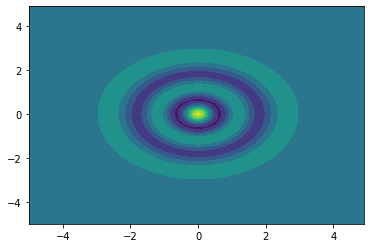

Photon number state:
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [6]:
F = pq.Fock(1, cutoff = 15) # (qumode数, cutoff 数)
F.n_photon(0, 4) # (qumode, photon number state)

F.run()

(x, p, W) = F.Wigner(0, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function

print("Photon number state:\n", F.state)

### Wigner function

光の量子状態は光子数状態で表す他に、Wigner関数を用いて$(q, p)$位相平面上の関数としてプロットすることができます。

```F.Wigner(mode, plot = 'y' or 'n', xrange = 5.0, prange = 5.0)```

光子数状態は密度演算子表記$\rho = \sum_{n, n'}C_{n n'}\ket{n}\bra{n'}$で書けて、

$\rho = \ket{n'}\bra{n}$に対して
- $n \leq n'$の場合
$W_{nn'}(q, p) = \frac{2(-1)^n}{\pi} \sqrt{\frac{2^{n'} n!}{2^{n} n'!}} (q-ip)^{n'-n}e^{-(q^2+p^2)}L_{n}^{n'-n}(2(q^2+p^2))$  
- $n' \leq n$の場合
$W_{nn'}(q, p) = \frac{2(-1)^{n'}}{\pi} \sqrt{\frac{2^{n} n'!}{2^{n'} n!}} (q+ip)^{n-n'}e^{-(q^2+p^2)}L_{n'}^{n-n'}(2(q^2+p^2))$  

を各$(q, p)$について計算し、プロットします。  
ここでプロットされた関数は、量子状態を位置$q$, または運動量$p$で測定する確率を表します。

### Desplacement gate

$D(\alpha) = \exp(\alpha \hat{a}^{\dagger} - \alpha^{*}a^{\dagger})$

$(q, p)$位相平面上で状態を$(Re(\alpha), Im(\alpha))$だけ平行移動させます。

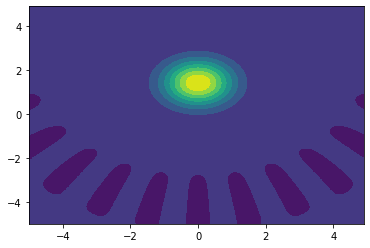

In [9]:
alpha = (0 + 1j) # parameter

F = pq.Fock(1, cutoff = 15)
F.D(0, alpha) # Dgate

F.run()

(x, p, W) = F.Wigner(0, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function

### Squeezing gate 

$S(\epsilon) = \exp{(\frac{1}{2}\epsilon^{*}\hat{a}^{2}} - \frac{1}{2}\epsilon\hat{a}^{\dagger 2})$  
$\epsilon = re^{2i\phi}$

Normal ordered form  

$S(r, \phi) = (\cosh{r})^{-1/2} \exp(-\frac{\Gamma}{2}\hat{a}^{\dagger 2}) \exp(-\ln(\cosh{r})\hat{a}^{\dagger}\hat{a}) \exp(\frac{\Gamma^{*}}{2}\hat{a}^{2})$

$(q, p)$位相平面上で状態を狭窄化(squeeze)します。  
パラメータ$\phi$はsqueezeの向きを示し、パラメータ$r$が大きいとより強くsqueezeされます。  
ある方向にsqueezeされ分布が狭くなると、それと直交する方向は逆に分布が広がります。

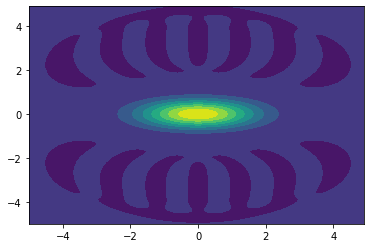

In [11]:
r = .5
phi = np.pi/2
eps = r * np.exp(2j * phi)

F = pq.Fock(1, cutoff = 15)
F.S(0, eps) # Sgate

F.run()

(x, p, W) = F.Wigner(0, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function

### Beam splitter

Beam splitter hamiltonian: $\hat{H} = i\hbar \theta (\hat{a}_{1}^{\dagger}\hat{a}_{2} -\hat{a}_{1}  \hat{a}_{2}^{\dagger})$

$BSgate = \exp(\frac{i}{\hbar}\hat{H})$

ビームスプリッタという素子で2つのモードにある光を混ぜ合わせます。  
ビームスプリッタとは入ってきた光の$R$%を反射し、$T$%を透過する($R + T=100$)素子で、一定量の光を透過する鏡のようなものです。

In [12]:
mode = 0
F = pq.Fock(2, cutoff = 20)
F.n_photon(0, 1)
F.n_photon(1, 1)
F.BS(0, 1, -np.pi/4) # 50:50 ビームスプリッタ
F.run()
res = F.photonSampling(0, ite = 50) # mode 0 のphoton数を50回サンプリング
print(res)
print("HOM干渉計：2つのSingle photon Modeをビームスプリッタに入力すると出力モードの光子数は必ず1方のモードが2, もう1方が0になる")

[2 2 0 2 2 2 2 0 0 2 0 0 2 2 2 0 2 2 2 0 0 0 0 2 0 0 2 2 0 2 2 2 0 0 0 0 2
 2 0 0 2 0 2 2 0 0 0 2 2 0]
HOM干渉計：2つのSingle photon Modeをビームスプリッタに入力すると出力モードの光子数は必ず1方のモードが2, もう1方が0になる


### Kerr gate 

Kerr hamiltoninan:  $H = \hbar \frac{\chi}{2} (\hat{a}^{\dagger})^2 \hat{a}^2$

$K = \exp{(\frac{i}{\hbar}H)} = \exp{(i\frac{\chi}{2} (\hat{a}^{\dagger})^2 \hat{a}^2)} = \exp{(i\frac{\chi}{2} \hat{a}^{\dagger} \hat{n} \hat{a})}$

光の媒質の中には屈折率が光の強度に依存するものが存在し、その現象はKerr効果と呼ばれます。  
位相平面上では中心からの距離(=強度)によって異なる角度で位相が回転します。

Kerr gateは非線形ゲートと呼ばれるものの1種です。  
連続量光量子計算においてユニバーサルな計算を行うには少なくとも1種の非線形ゲートが必要と言われています。

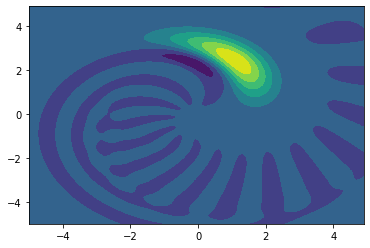

In [17]:
alpha = 2
chi = .2

F = pq.Fock(1, cutoff = 20)
F.D(0, alpha)
F.Kerr(0, chi)
F.run()

x, p, W = F.Wigner(0, method = 'clenshaw') # plot